In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
import sys
path = "/home/kyle/GWA/NANOGrav/AutoMCMC/autoMCMC"
sys.path.insert(0,path)
from autoMCMC import mcmc

In [3]:
a = 2.5
omega = .1
phi = np.pi/2
white = .1

data = np.zeros(1000)
for i in range(0,1000):
    data[i]= a*np.sin(omega*i+phi)+ np.random.normal(0,white)

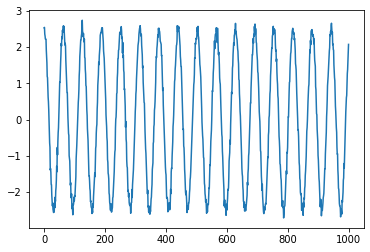

In [4]:
plt.plot(data[:])
plt.show()

In [8]:
def loglikely(data,params):
    am = params[0]
    om = params[1]
    ph = params[2]
    wh = params[3]
    
    N = len(data)
    const = (N/2)*np.log(2*np.pi)
    ret = 0
    for i in range(0,N):
        ret += ((data[i]-(am*np.sin(om*i+ph)))**2)
    return (-(N/2)*np.log(2*np.pi*(wh**2)))-((1/(2*(wh**2)))*ret)


In [11]:
newMCMC = mcmc()
newMCMC.setDataset(data)
newMCMC.setLikelyhoodFunction(loglikely,['Amplitude','Omega','Phi','White Noise'],logLikely=True)
newMCMC.start(10000)

Object created


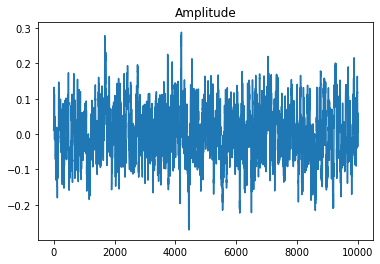

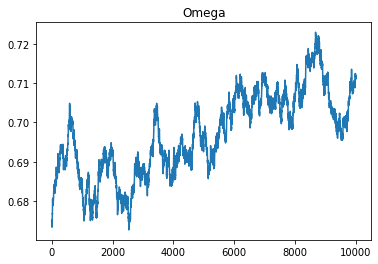

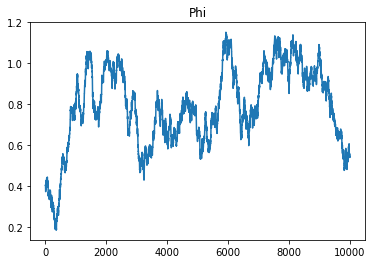

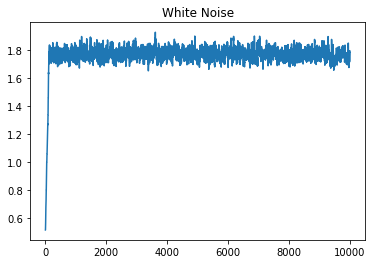

In [12]:
newMCMC.showChains()